In [6]:
import numpy as np
import torch as th

import matplotlib.pyplot as plt

In [3]:
from Utils import prices

def bs_sim(maturity, freq, n_sim):
    T = 250     # annual days
    dt = freq / 365
    n_periods = int(maturity / dt)

    drift = 0.05
    vol = 0.2
    init_price = 100
    strike_price = 100
    r = 0
    q = 0

    print('1. generate asset price paths')
    bm_price = prices.geometric_brownian_motion(n_sim, n_periods, drift, vol, init_price, dt)
    expiry = np.arange(maturity, -freq, -freq)

    print('2. generate BS price and delta')
    op_price, op_delta = prices.european_call_price(bm_price/strike_price, expiry, vol, 0, strike_price, 0, True)

    print('Done')

    return bm_price, op_price, op_delta

In [5]:
def bm_sim(n_paths, n_periods, drift, vol, init_price, dt):
    z = th.randn(n_periods, n_paths).numpy()
    asset_price = np.zeros_like(z)
    asset_price[0, :] = init_price

    for t in range(n_periods - 1):
        asset_price[t+1, :] = asset_price[t, :] * np.exp((drift - (vol ** 2)/2)*dt + vol*np.sqrt(dt)*z[t, :])

    return asset_price

In [10]:
from Utils.tensors import set_seed

set_seed(42)
p1 = prices.geometric_brownian_motion(5, 300, 0.05, 0.2, 100, 1/365)
set_seed(42)
p2 = bm_sim(5, 300, 0.05, 0.2, 100, 1/365)

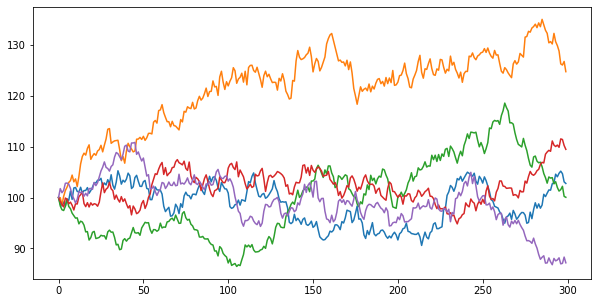

In [11]:
plt.figure(figsize=(10,5))
plt.plot(p1)
plt.show()

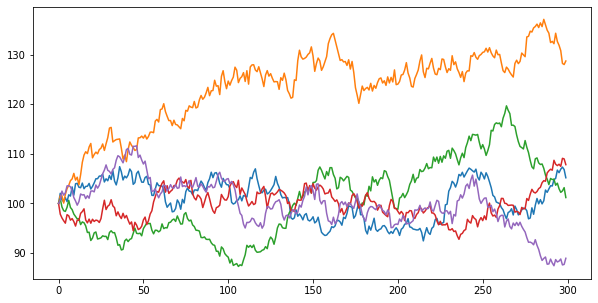

In [12]:
plt.figure(figsize=(10,5))
plt.plot(p2)
plt.show()

In [ ]:
def sabr_sim(n_paths, n_periods, drift, vol, init_prices, dt, rho, beta, vol_of_vol):
    z1 = th.randn(n_paths, n_periods).numpy()
    z2 = th.randn(n_paths, n_periods).numpy()
